In [1]:
import time , sys , os , math , datetime
import matplotlib , pandas as pd , numpy as np
import matplotlib as mpl , seaborn as sns; sns.set(style="white", color_codes=True , font_scale=1)
from matplotlib import pyplot as plt
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
import GeneralPlot as gp , Initiation as init
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/CLASEG2DataMining/EG2DataMiningPackage/mac')
from cm_tools import resutlsFName
path = "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm"
dirname = init.createnewdir()

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


In [52]:
my_hot_cmap = gp.reverse_colourmap(mpl.cm.hot)
def plot_sns( simulation_results , x , y , xlabel = '' , ylabel = '' ):    
    with sns.axes_style("white"):
#         g = sns.jointplot(x=simulation_results[x], y=simulation_results[y] , 
#                           cmap=my_hot_cmap, kind="hex", stat_func=None,
#                           marginal_kws={'color': 'green'})
        g = sns.JointGrid(x=simulation_results[x], y=simulation_results[y] )
        g.plot_joint(sns.regplot, order=2)  
        g.plot_marginals(sns.distplot)
    if xlabel=='': xlabel = x
    if ylabel=='': ylabel = y
    g.set_axis_labels(xlabel,ylabel)
#     plt.colorbar()
    plt.show()
    g.savefig(dirname + "/%s_vs_%s.pdf"%(x,y))
    
def plot_1d( simulation_results , x , xlabel=''):
    ax = sns.distplot(simulation_results[x])
    if xlabel=='': xlabel = x
    fig = ax.get_figure()
    plt.show()
    fig.savefig(dirname + "/%s.pdf"%x)

def sigma_l(direction,addition):
    return addition + ' $\sigma_{%s}$ [GeV/c]'%direction
def mean_l(direction,addition):
    return addition + ' $\mu_{%s}$ [GeV/c]'%direction

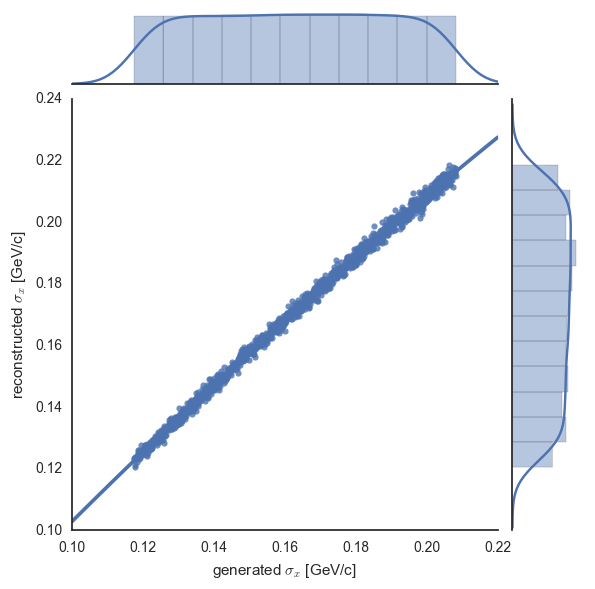

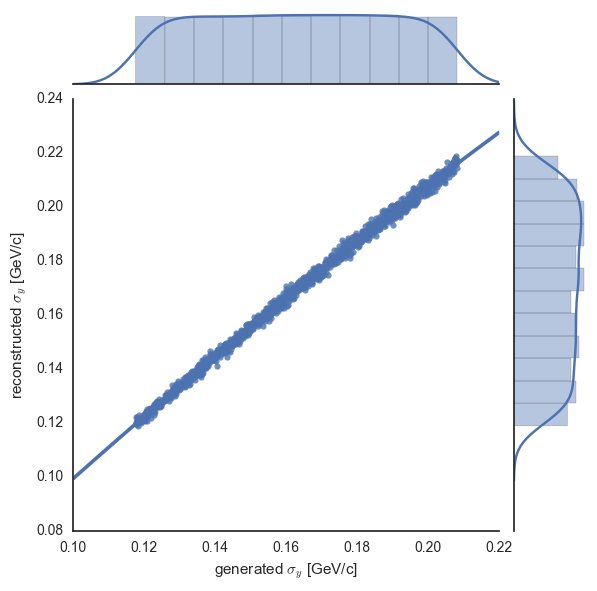

In [44]:
test_name = "VaryOnlySigmaT"

simulation_results = pd.read_csv( path + "/final_simulation_results/" + test_name + "/simulationEG_simulated_runs_results_cm_parameters.csv" )

plot_sns( simulation_results,'genSigmaX','recSigmaX_unweighted',sigma_l('x','generated'), sigma_l('x','reconstructed'))
plot_sns( simulation_results,'genSigmaY','recSigmaY_unweighted',sigma_l('y','generated'), sigma_l('y','reconstructed'))

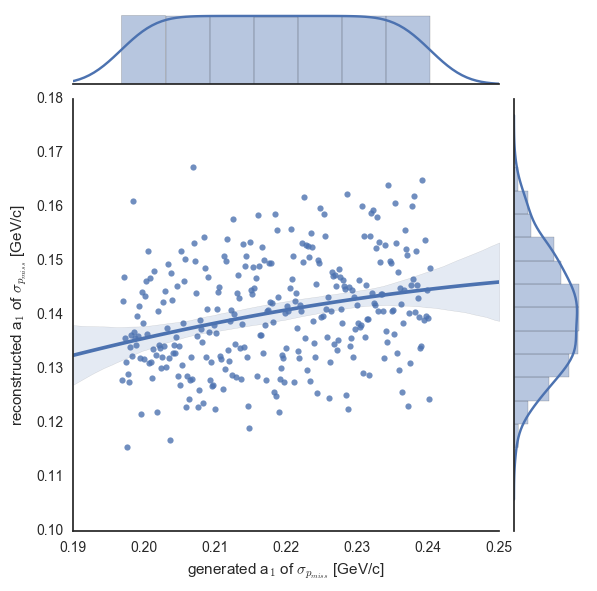

In [48]:
test_name = "VaryOnlySigmaZa1"
simulation_results = pd.read_csv( path + "/final_simulation_results/" + test_name + "/simulationEG_simulated_runs_results_cm_parameters.csv" )
plot_sns( simulation_results,'genSigmaZa1','recSigmaZa1_unweighted',sigma_l('p_{miss}','generated a$_{1}$ of'), sigma_l('p_{miss}','reconstructed a$_{1}$ of'))

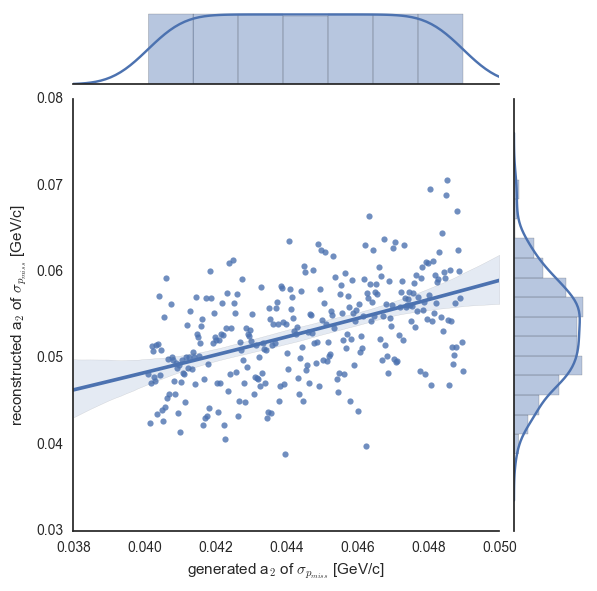

In [51]:
test_name = "VaryOnlySigmaZa2"
simulation_results = pd.read_csv( path + "/final_simulation_results/" + test_name + "/simulationEG_simulated_runs_results_cm_parameters.csv" )
plot_sns( simulation_results,'genSigmaZa2','recSigmaZa2_unweighted',sigma_l('p_{miss}','generated a$_{2}$ of'), sigma_l('p_{miss}','reconstructed a$_{2}$ of'))

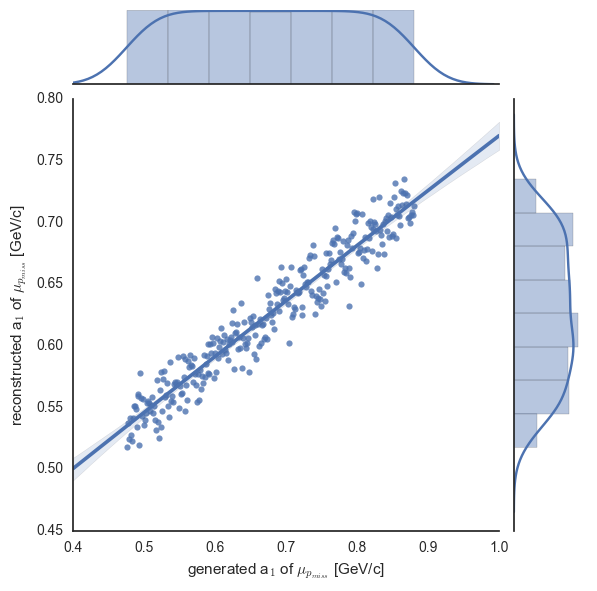

In [53]:
test_name = "VaryOnlyMeanZa1"
simulation_results = pd.read_csv( path + "/final_simulation_results/" + test_name + "/simulationEG_simulated_runs_results_cm_parameters.csv" )
plot_sns( simulation_results,'genMeanZa1','recMeanZa1_unweighted',mean_l('p_{miss}','generated a$_{1}$ of'), mean_l('p_{miss}','reconstructed a$_{1}$ of'))

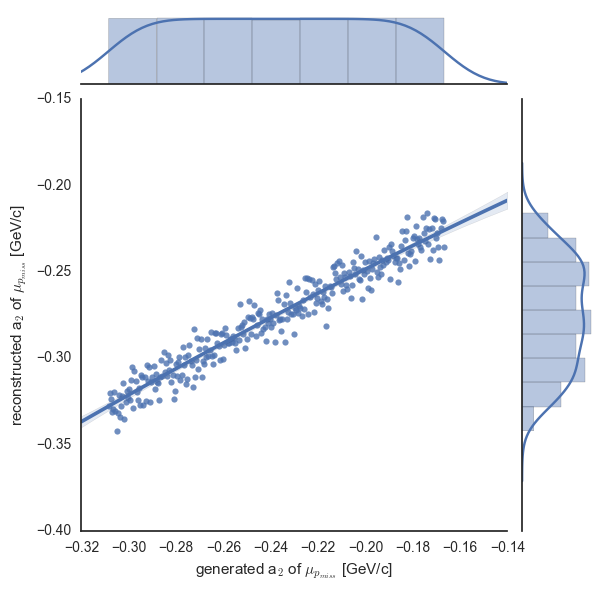

In [54]:
test_name = "VaryOnlyMeanZa2"
simulation_results = pd.read_csv( path + "/final_simulation_results/" + test_name + "/simulationEG_simulated_runs_results_cm_parameters.csv" )
plot_sns( simulation_results,'genMeanZa2','recMeanZa2_unweighted',mean_l('p_{miss}','generated a$_{2}$ of'), mean_l('p_{miss}','reconstructed a$_{2}$ of'))

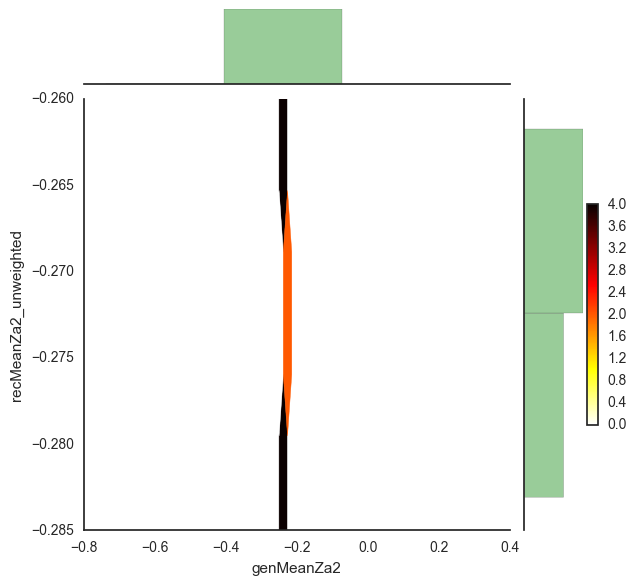

In [9]:
plot_sns( 'genMeanZa2' , 'recMeanZa2_unweighted' )

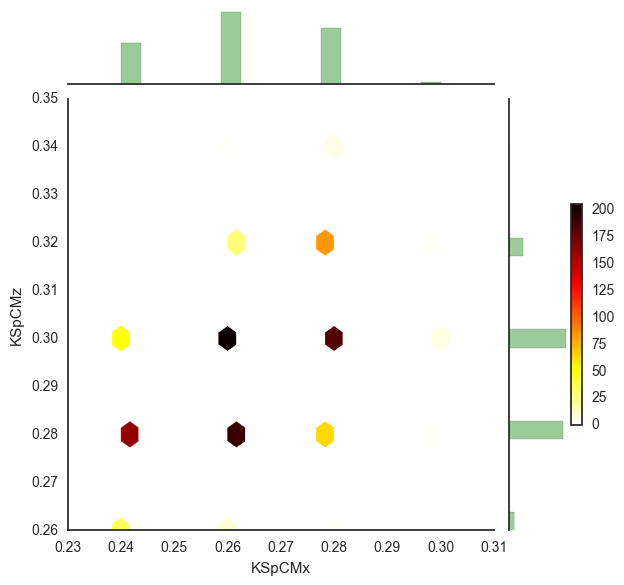

In [28]:
plo_sns( 'KSpCMx' , 'KSpCMz' )

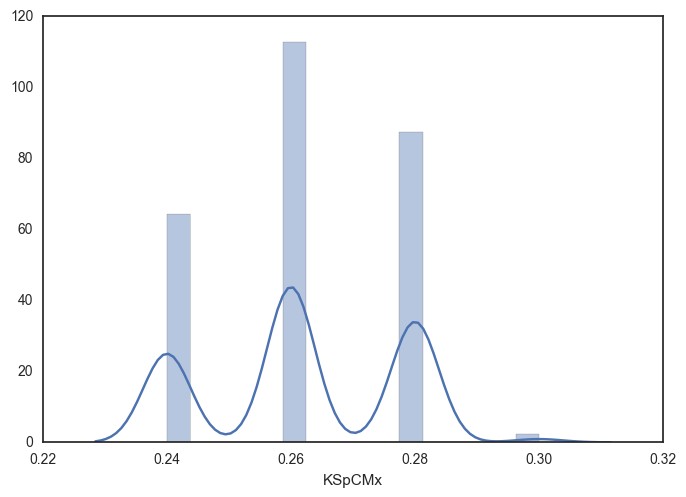

In [38]:
plot_1d('KSpCMx')

In [12]:
# simulation_results['KStPval_Avg']=np.average([simulation_results['KStPval_0'],simulation_results['KStPval_1'],simulation_results['KStPval_2'],simulation_results['KStPval_3'],simulation_results['KStPval_4']])

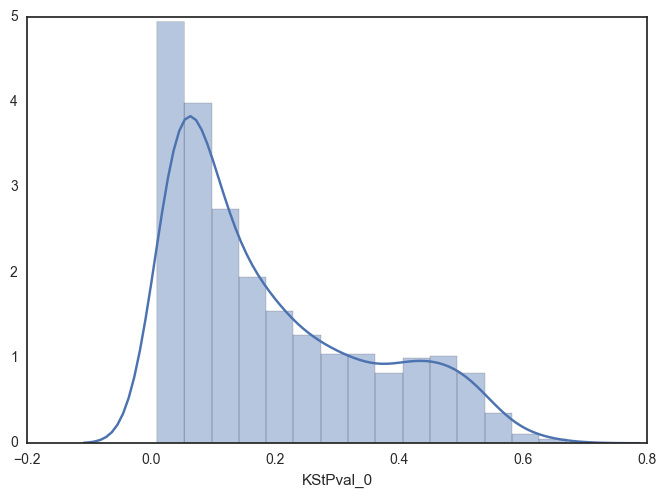

In [4]:
# simulation_results['KStPval_Avg']
plot_1d('KStPval_0')

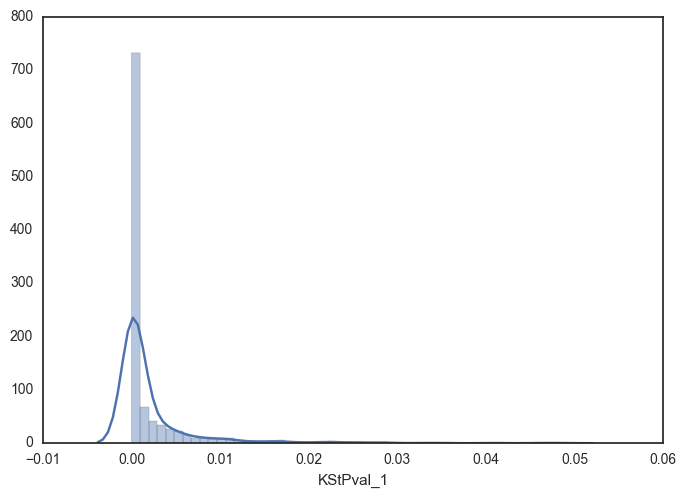

In [5]:
plot_1d('KStPval_1')

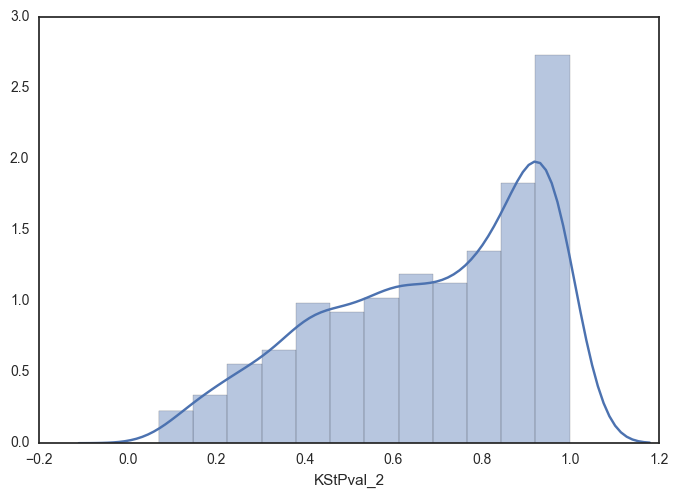

In [6]:
plot_1d('KStPval_2')

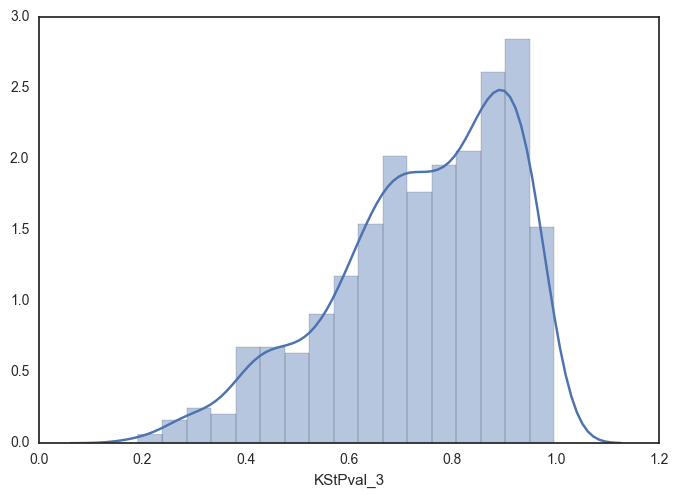

In [7]:
plot_1d('KStPval_3')

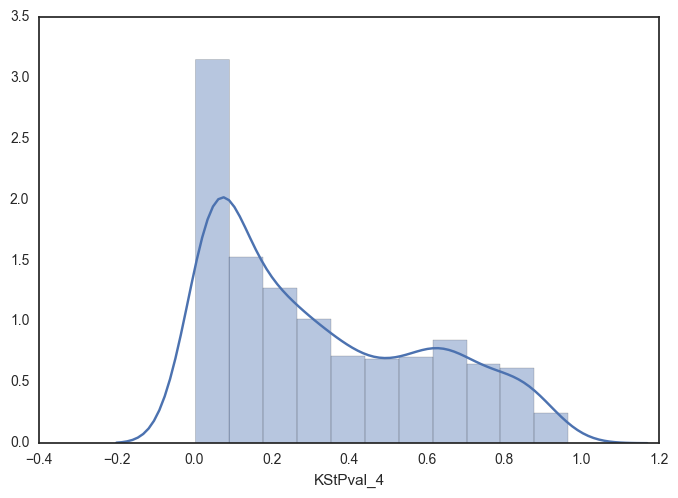

In [8]:
plot_1d('KStPval_4')

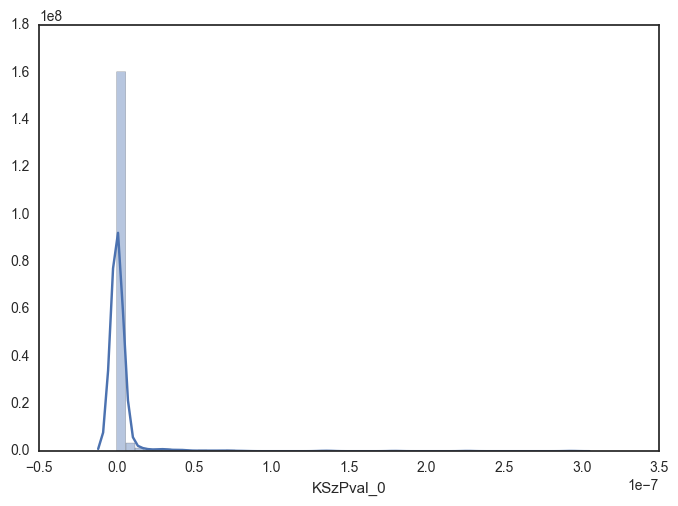

In [9]:
plot_1d('KSzPval_0')

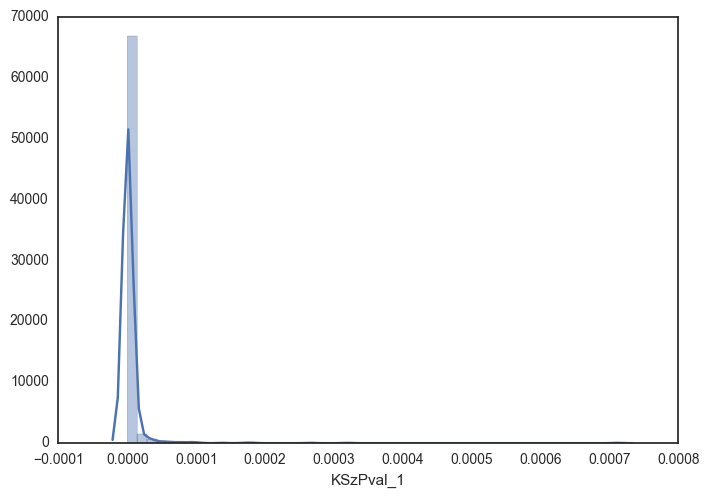

In [10]:
plot_1d('KSzPval_1')

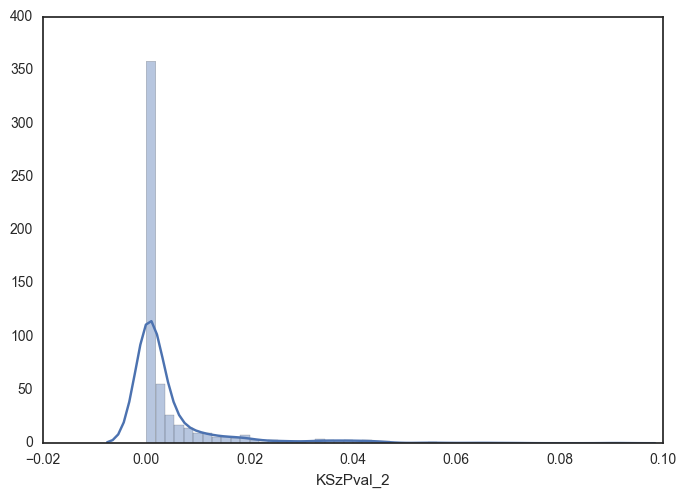

In [11]:
plot_1d('KSzPval_2')

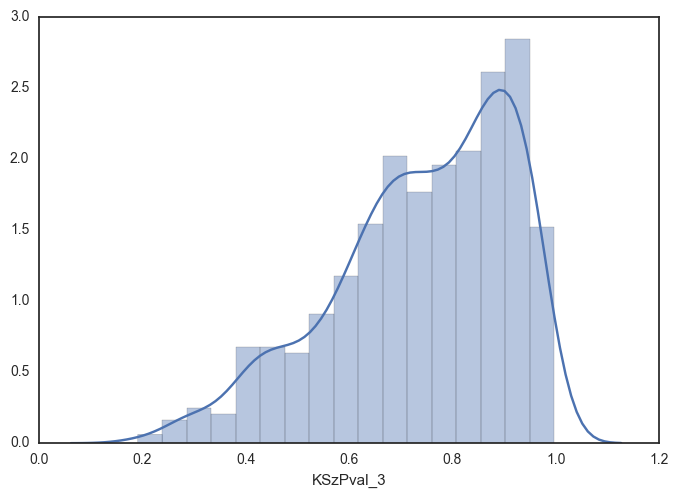

In [12]:
plot_1d('KSzPval_3')

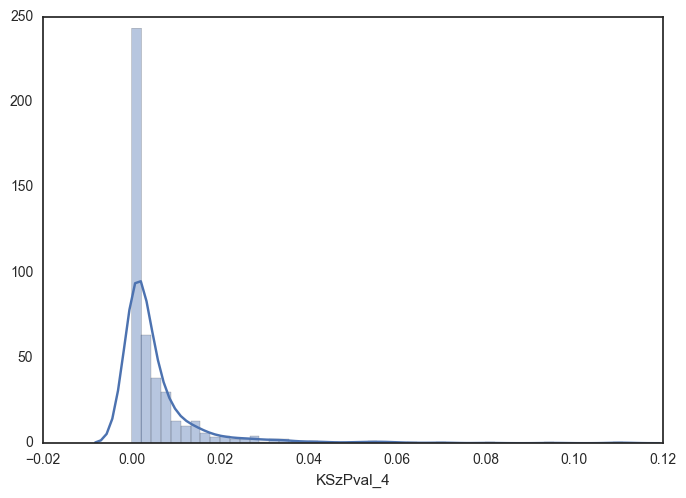

In [13]:
plot_1d('KSzPval_4')

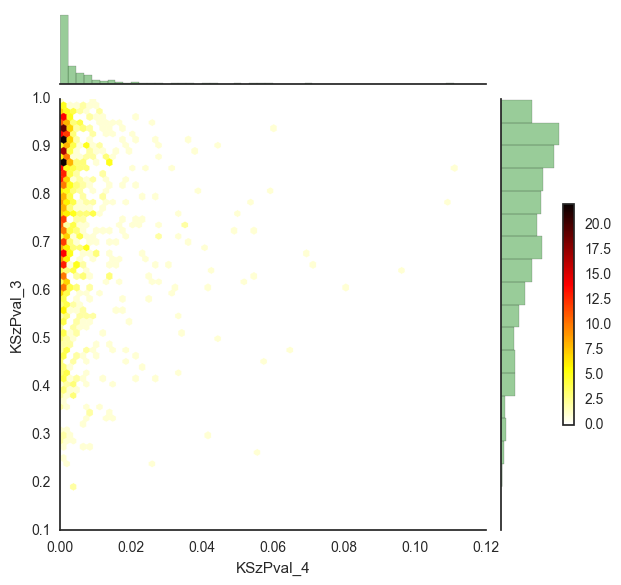

In [4]:
plo_sns( 'KSzPval_4' , 'KSzPval_3' )

In [6]:
simulation_results['KSyPval_avg']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
2018    0.314313
2019    0.399287
2020    0.408386
2021    0.420756
2022    0.416717
2023    0.468783
2024    0.450748
2025    0.424963
2026    0.425024
2027    0.505906
2028    0.389558
2029    0.439924
2030    0.453283
2031    0.425690
2032    0.389493
2033    0.476483
2034    0.455468
2035    0.285151
2036    0.446374
2037    0.457281
2038    0.411726
2039    0.389201
2040    0.484086
2041    0.471649
2042    0.496140
2043    0.409142
2044    0.469578
2045    0.4681